In [74]:
file_name = "03-03-2022_12-19-03MSDIdx.ply"
file_name = "04-03-2022_13-12-22MSDIdx.ply"
file_name

'04-03-2022_13-12-22MSDIdx.ply'

In [75]:
with open(file_name) as f:
    data = f.readlines()
print(data[7:])

['-347.6000 126.5890 655.9000\n', '-348.6300 128.1500 657.8430\n', '-348.6300 129.3360 657.8430\n', '-349.3190 130.7800 659.1440\n', '-349.3190 131.9680 659.1440\n', '-350.7070 133.6850 661.7620\n', '-347.1010 128.0230 657.1940\n', '-347.4440 129.3360 657.8430\n', '-348.1310 130.7800 659.1440\n', '-348.1310 131.9680 659.1440\n', '-349.1670 133.5520 661.1060\n', '-350.2090 135.1460 663.0790\n', '-346.2580 128.1500 657.8430\n', '-346.2580 129.3360 657.8430\n', '-346.6000 130.6500 658.4930\n', '-346.9430 131.9680 659.1440\n', '-347.2860 133.2880 659.7970\n', '-348.3210 134.8780 661.7620\n', '-344.3920 125.5300 656.5460\n', '-344.3920 126.7140 656.5460\n', '-345.0720 128.1500 657.8430\n', '-345.0720 129.3360 657.8430\n', '-345.4130 130.6500 658.4930\n', '-345.7550 131.9680 659.1440\n', '-346.4400 133.4200 660.4510\n', '-347.1280 134.8780 661.7620\n', '-343.2090 125.5300 656.5460\n', '-343.2090 126.7140 656.5460\n', '-343.5470 128.0230 657.1940\n', '-343.8860 129.3360 657.8430\n', '-344.567

In [76]:
data_1 = list(map(lambda x: x.strip(), data[7:]))
len(data_1)

833

In [77]:
import matplotlib.pyplot as plt

In [78]:
import numpy as np
import pandas as pd

In [79]:
x,y,z = [],[],[]

for i in data_1:
    j = i.split(" ")
    x.append(j[0])
    y.append(j[1])
    z.append(j[2])
    
print(len(x), len(y), len(z))

833 833 833


In [80]:
# x = pd.Series(x)
# y = pd.Series(y)
# z = pd.Series(z)

x = pd.Series(x)
y = pd.Series(y)
z = pd.Series(z)

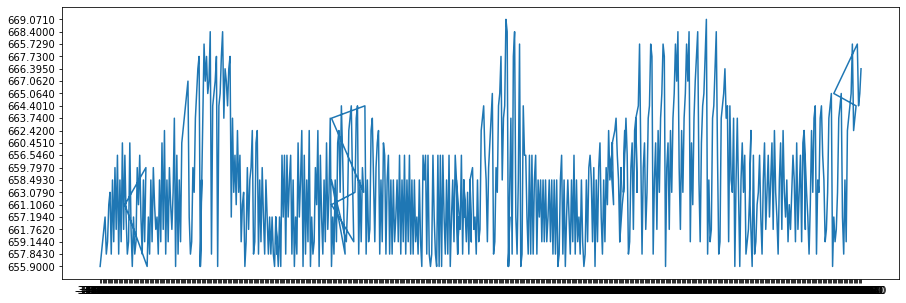

In [91]:
plt.figure(figsize=(15,5))
plt.plot(x, z);

(833,) (833,)


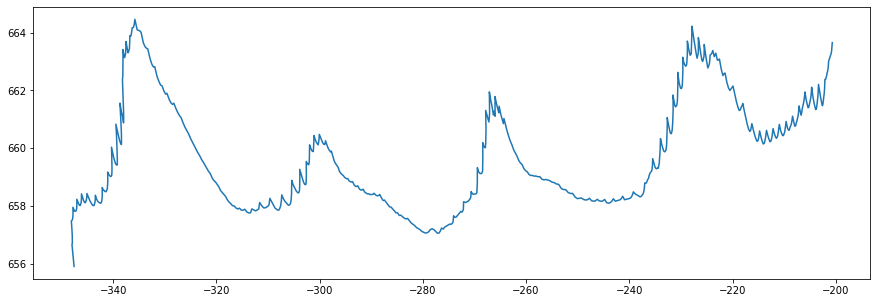

In [82]:
x_ = x.ewm(alpha=0.05,adjust=False).mean()
z_ = z.ewm(alpha=0.05,adjust=False).mean()
print(x_.shape, z_.shape)
plt.figure(figsize=(15,5))
plt.plot(x_, z_);

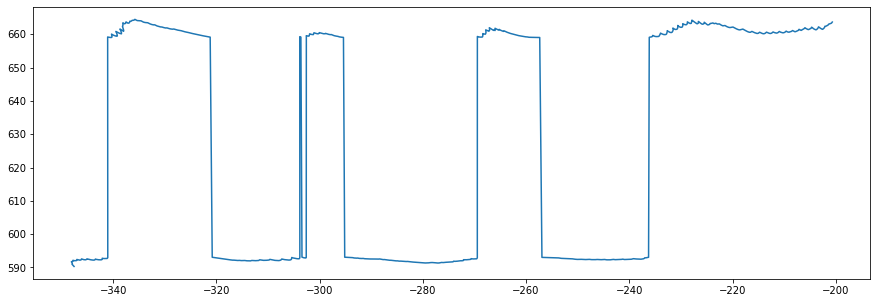

In [83]:
thresh_considered = 659
multiplication_factor = 0.9

zz = z_.apply(lambda x: x*multiplication_factor if x < thresh_considered else x)

plt.figure(figsize=(15,5))
plt.plot(x_, zz);

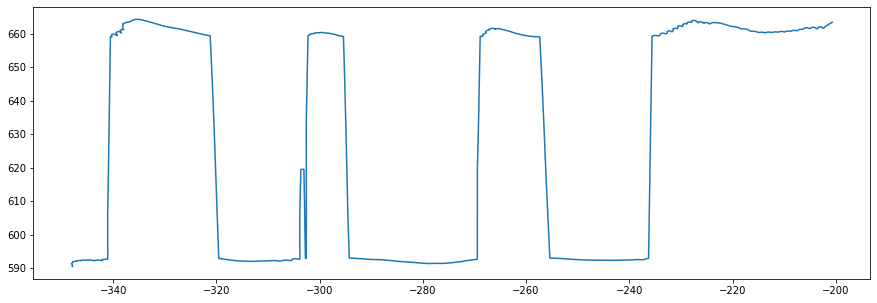

In [84]:
window_size = 5

zz_ = zz.rolling(window=window_size).mean()
# zz_ = zz_.rolling(window=window_size).max()
# zz_ = zz_.rolling(window=window_size).mean()
plt.figure(figsize=(15,5))
plt.plot(x_, zz_);

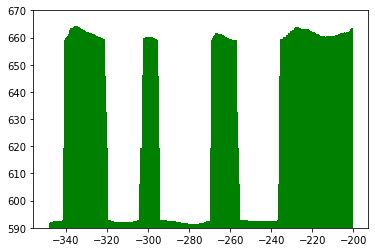

In [90]:
lower_limit = 590
upper_limit = 670

plt.bar(x_, zz_,color='green')
plt.ylim(lower_limit,upper_limit);